In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/price_data.csv',index_col="調査日",parse_dates=True)

In [4]:
df = df.resample("W-MON").last() 

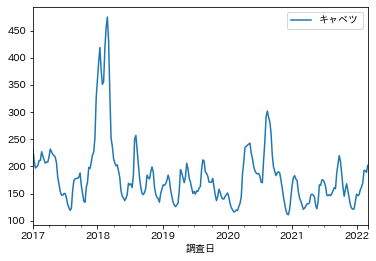

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
df.plot()

In [9]:
import statsmodels.api as sm

In [10]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


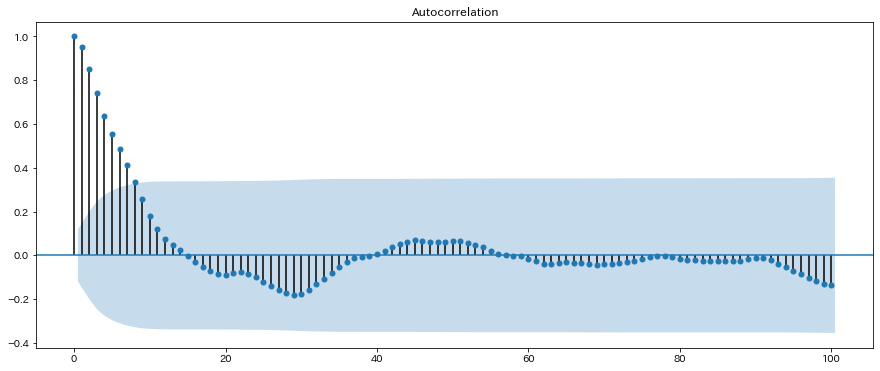

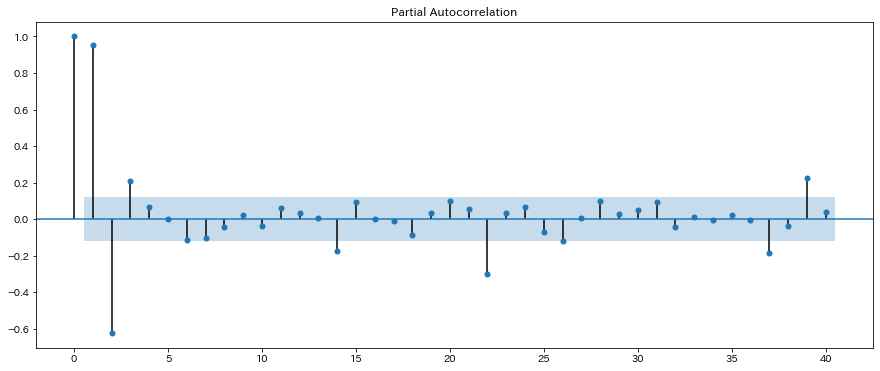

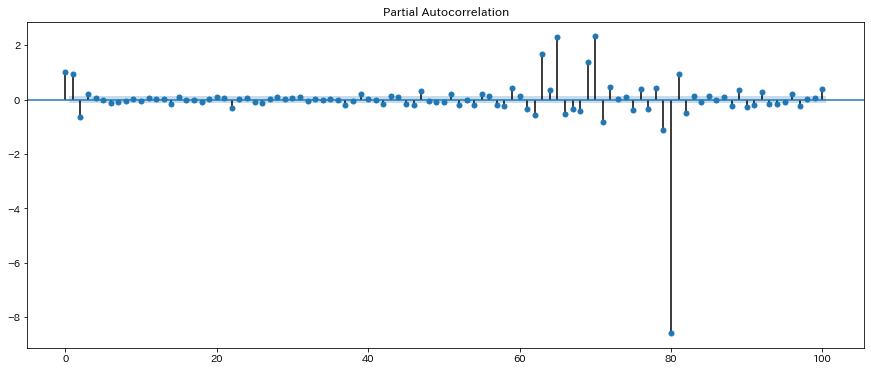

In [11]:
fig = sm.graphics.tsa.plot_acf(df["キャベツ"], lags=100)
fig = sm.graphics.tsa.plot_pacf(df["キャベツ"], lags=40)
fig = sm.graphics.tsa.plot_pacf(df["キャベツ"], lags=100)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


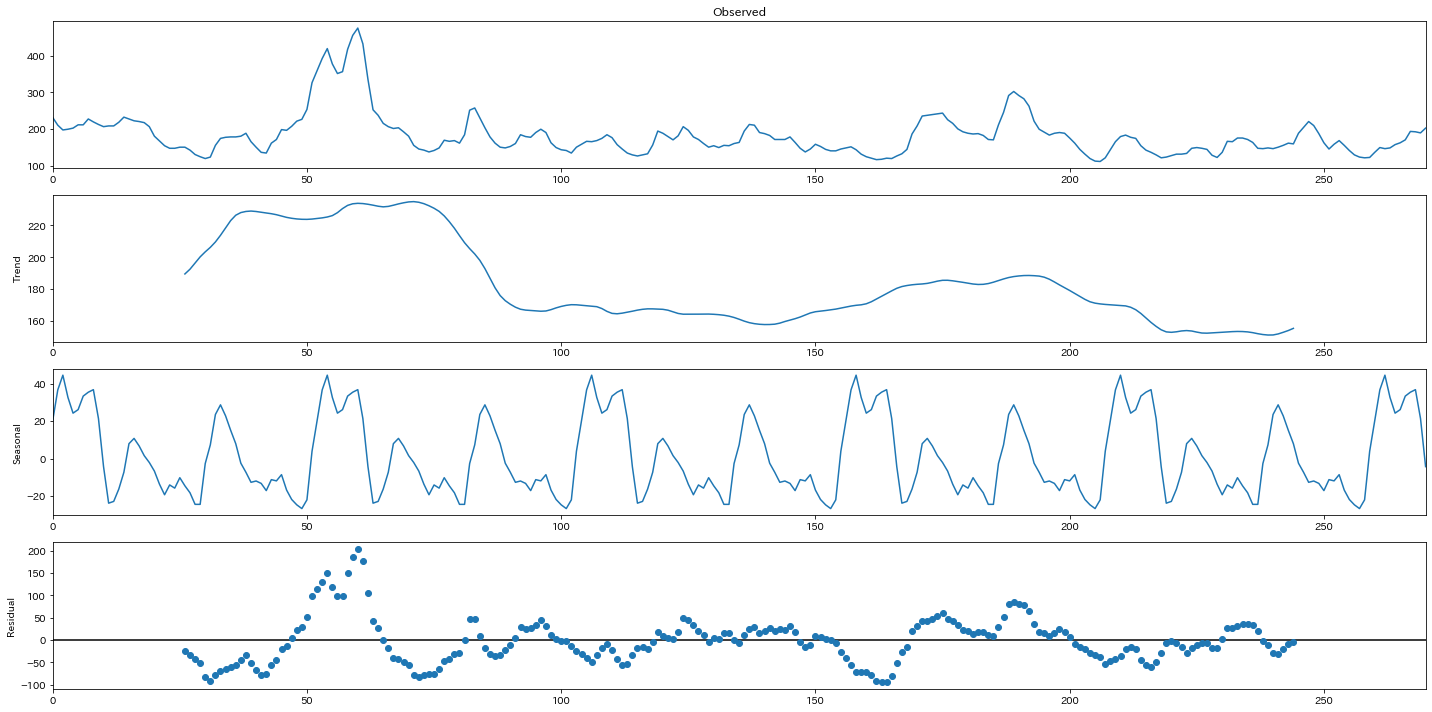

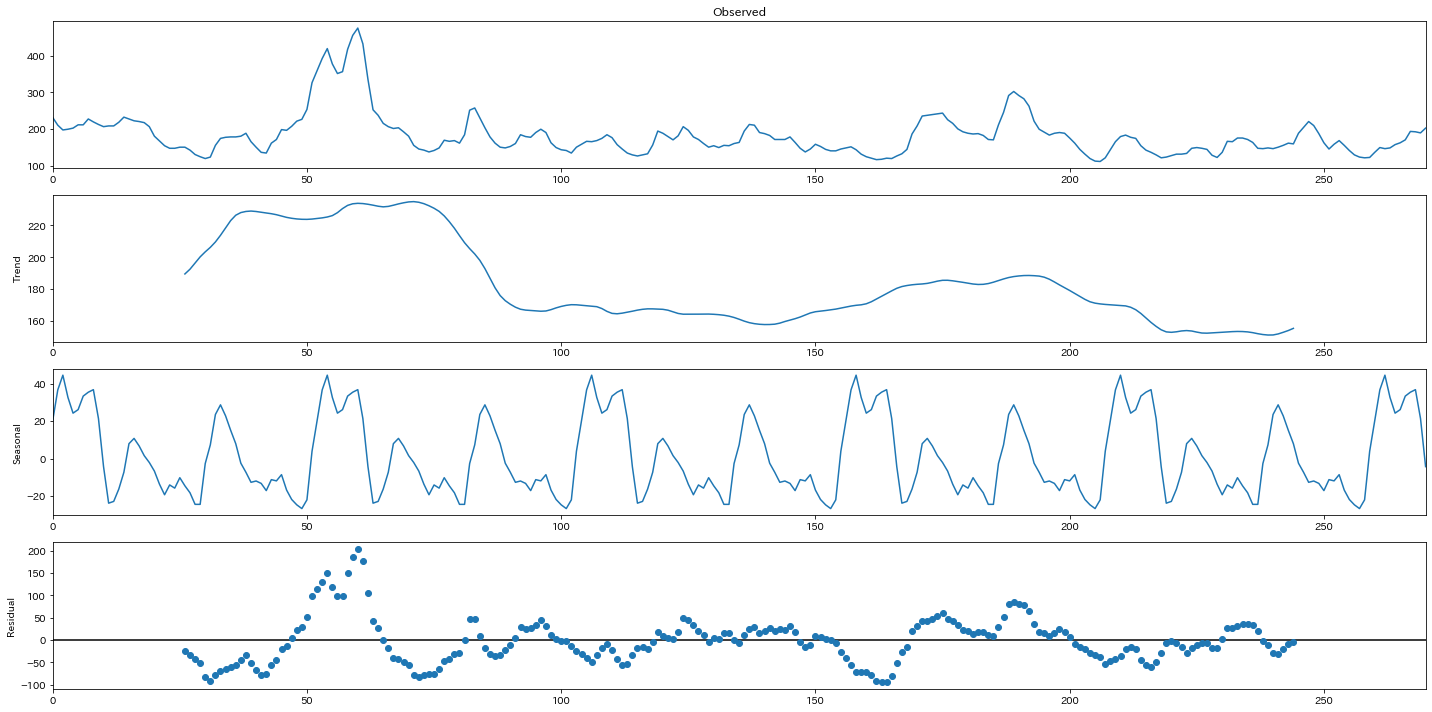

In [14]:
plt.rc("figure",figsize=(20,10))
sm.tsa.seasonal_decompose(df["キャベツ"].values, freq=52).plot()

春キャベツの収穫時期...4〜6月  
冬キャベツの収穫時期...11〜3月  
一般的に7~10月は時期ではないので高くなると言われている → 周期性があると考えられる

一年ごとに周期性をとってみた結果。傾向としては減少傾向

残差にみられる増加(50付近)はおそらく台風雨の影響  
150過くらいの下落はおそらく暖冬による豊作

ARIMAモデルに当てはめ、残差に周期性が出るか確認してみる

In [15]:
y = df["キャベツ"]

In [16]:
# グリッドサーチ
import itertools

p = q =  range(0, 3)
sp = sd = sq = range(0, 2)

#p,q,sp,sd,sqの組み合わせのリストを作成する。和分=1,周期=12は固定
pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]

In [17]:
import warnings
warnings.filterwarnings("ignore")
param_scorelist=[]
best_result = [0, 10000000]
for param in pdq:
    try:
        mod = sm.tsa.SARIMAX(y, order = param)
        results = mod.fit()
        print('ARIMAパラメータ{}, - AIC: {}'.format(param, results.aic))
            
        if results.aic < best_result[1]:
            best_result = [param, results.aic]
    except:
        continue

print('AIC最小のモデル：', best_result)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27854D+00    |proj g|=  2.08438D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.191D-06   4.279D+00
  F =   4.2785370297891925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.05320D+00    |proj g|=  4.88880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   7.440D-06   4.053D+00
  F =   4.0531781464065393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 2), - AIC: 2204.8225553523444
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 var

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


In [18]:
sarima_model = sm.tsa.SARIMAX(y, order=(2,1,1))
result = sarima_model.fit()

result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04253D+00    |proj g|=  1.12291D-02

At iterate    5    f=  4.04145D+00    |proj g|=  3.53156D-03

At iterate   10    f=  4.04141D+00    |proj g|=  8.36941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   3.600D-06   4.041D+00
  F =   4.0414055143663381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   キャベツ   No. Observations:                  271
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1095.221
Date:                Sun, 27 Mar 2022   AIC                           2198.442
Time:                        19:59:55   BIC                           2212.835
Sample:                    01-02-2017   HQIC                          2204.222
                         - 03-07-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0645      0.145      7.328      0.000       0.780       1.349
ar.L2         -0.4596      0.079     -5.791      0.000      -0.615      -0.304
ma.L1         -0.3729      0.157     -2.368      0.018      -0.681      -0.064
sigma2       194.9420     11.430     17.056      0.000     172.540     217.344
===================================================================================
Ljung-Box (Q):                       44.31   Jarque-Bera (JB):               131.68
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

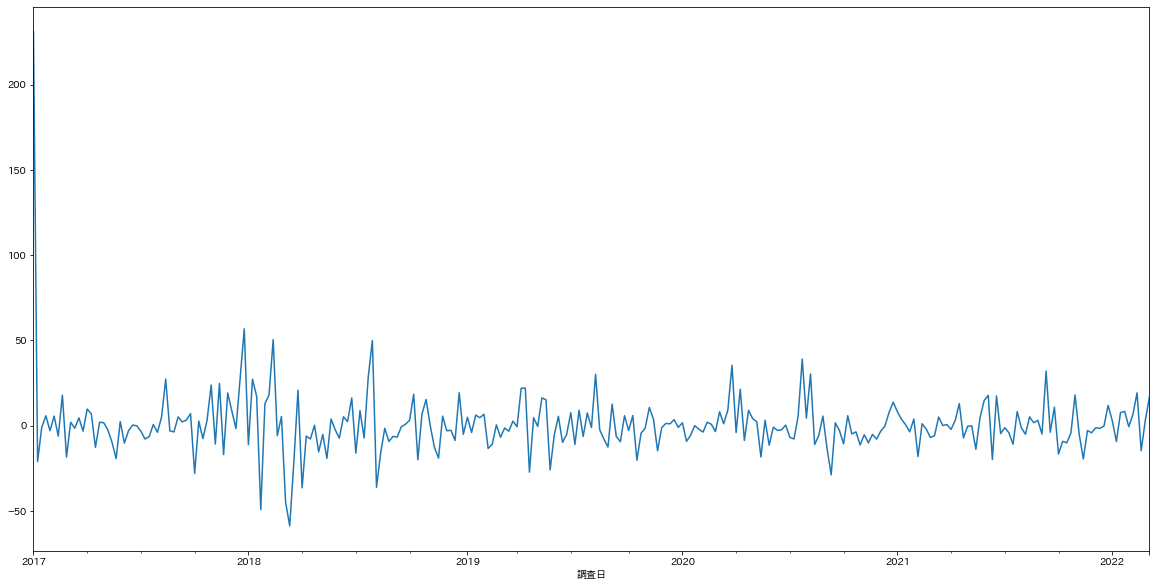

In [19]:
result.resid.plot()

別の周期性はなさそうに見える

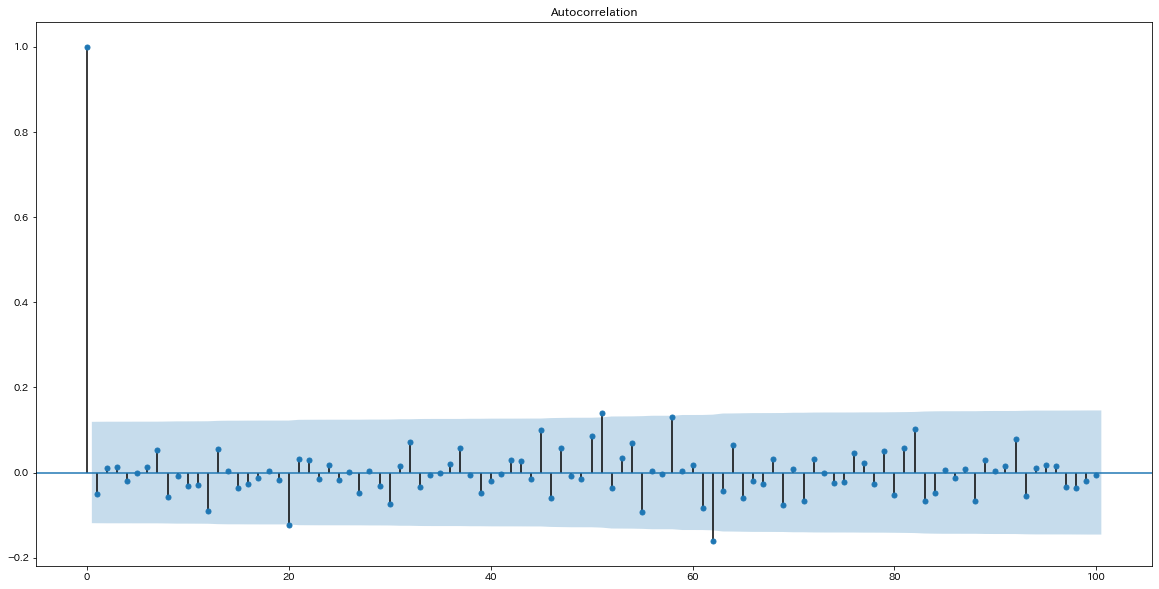

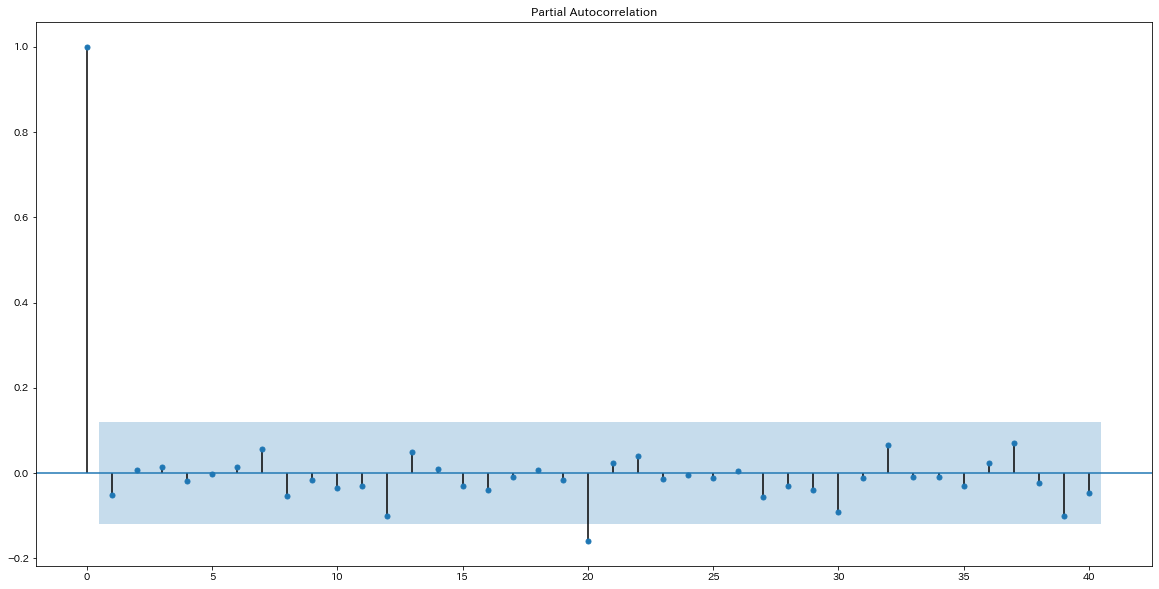

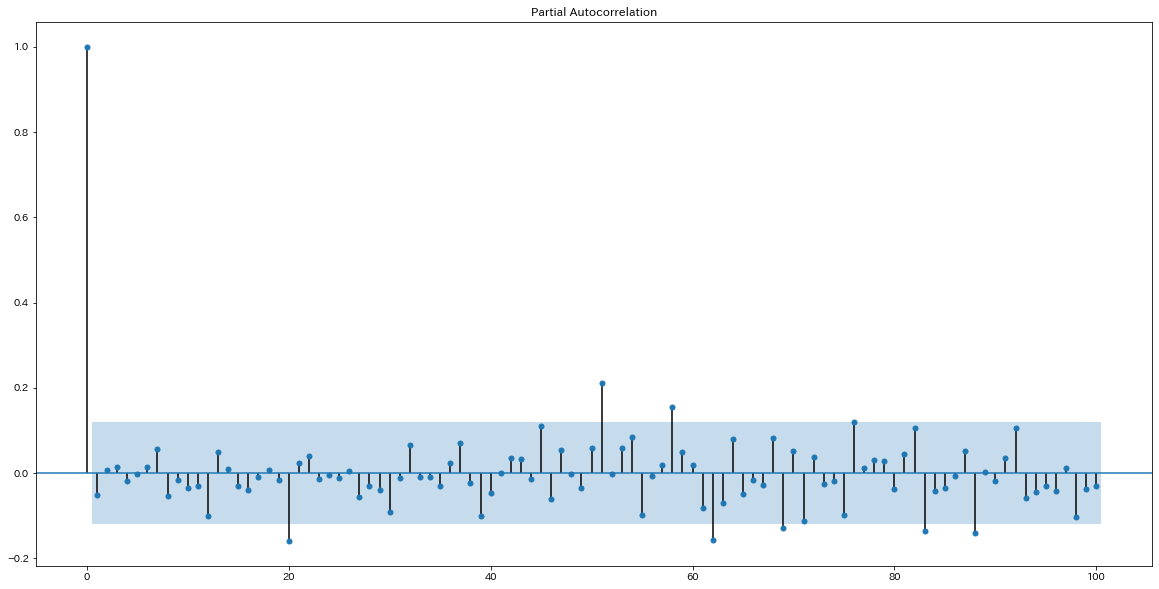

In [20]:
fig = sm.graphics.tsa.plot_acf(result.resid, lags=100)
fig = sm.graphics.tsa.plot_pacf(result.resid, lags=40)
fig = sm.graphics.tsa.plot_pacf(result.resid, lags=100)